In [12]:
from main_sbm import SBM
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import igraph as ig
import pickle as pkl
from collections import Counter
from eval import retrieve_samples
from igraph.clustering import compare_communities

In [6]:
def generate_graph_bicluster(Sr, Sc, thetas, random_seed = None, edge = "binary", undirected = False):
    # Kr = thetas.shape[0]
    # Kc = thetas.shape[1]

    N = np.sum(Sr)

    Hr = []
    c = 0
    for i in Sr:
        for j in range(i):
            Hr += [c]
        c+=1

    Hc = []
    c = 0
    for i in Sc:
        for j in range(i):
            Hc += [c]
        c+=1

    if isinstance(random_seed, int):
        np.random.seed(random_seed)

    X = np.zeros((N,N))
    if edge == "binary":
        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                X[i, j] = np.random.binomial(1, thetas[Hr[i], Hc[j]])
    elif edge == "weighted":
        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                X[i, j] = np.random.poisson(thetas[Hr[i], Hc[j]], 1)

    if undirected:
        X = np.triu(X) + np.triu(X).T

    return X

def train_val_split(data, valid_dim=0.2, random_seed = 42):
        '''
        Creating two additional objects, i.e. training and validation set, which can be used in the fitting process

        Parameters:
        data = np.array
        valid_dim = float
        '''
        if valid_dim >= 1:
          raise ValueError("valid_dim must be lower than 1")

        train = data.copy()
        valid = np.zeros(data.shape)

        np.random.seed(random_seed)

        for u in np.unique(data.nonzero()[0]):
            ind = data[u].nonzero()[0] 

            if len(ind) > 0: 
                valid_ind = np.random.choice(ind, round(len(ind)*valid_dim), replace=False)
                for i in valid_ind:
                    valid[u,i], train[u,i] = data[u,i], 0
        return train, valid

In [3]:
n_clust = 5
theta = np.zeros((n_clust,n_clust)) + 0.25
np.fill_diagonal(theta, 0.75)

# Sr = [20]*n_clust
# Sc = [20]*n_clust

Sr = [20, 20, 20, 20, 20]
Sc = [20, 20, 20, 20, 20]

# Sr = [15, 15, 15, 15]
# Sc = [15, 15, 15, 15]

Hr = []
c = 0
for i in Sr:
    for j in range(i):
        Hr += [c]
    c+=1

Hc = []
c = 0
for i in Sc:
    for j in range(i):
        Hc += [c]
    c+=1

z0 = [np.array(Hr), np.array(Hc)]

N = np.sum(Sr)
true_rho = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i == j:
            continue
        true_rho[i,j] += theta[z0[0][i], z0[1][j]]

X = generate_graph_bicluster(Sr, Sc, theta, random_seed=40) #CASE 1

In [7]:
n_clust = 5
theta = np.zeros((n_clust,n_clust)) + 0.25
np.fill_diagonal(theta, 0.75)
Sr = [20, 20, 20, 20, 20]
Sc = [20, 20, 20, 20, 20]

Hr = []
c = 0
for i in Sr:
    for j in range(i):
        Hr += [c]
    c+=1

Hc = []
c = 0
for i in Sc:
    for j in range(i):
        Hc += [c]
    c+=1

z0 = [np.array(Hr), np.array(Hc)]

N = np.sum(Sr)
true_rho = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if i == j:
            continue
        true_rho[i,j] += theta[z0[0][i], z0[1][j]]

X = generate_graph_bicluster(Sr, Sc, theta, random_seed=40) #CASE 1

X_gt_theta = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in range(len(X)):
        if i == j:
            continue
        X_gt_theta[i,j] = theta[z0[0][i], z0[1][j]]

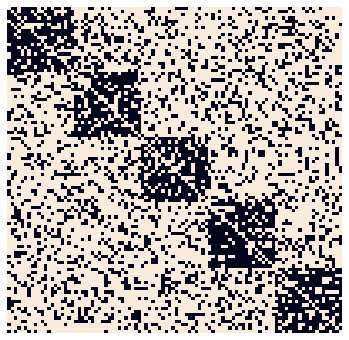

In [5]:
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.heatmap(X, linewidth=0.0, ax = ax, cbar=False, cmap= 'rocket_r', xticklabels=[], yticklabels=[])
plt.show()

In [9]:
train, test = train_val_split(X, valid_dim = 0.5, random_seed= 98)

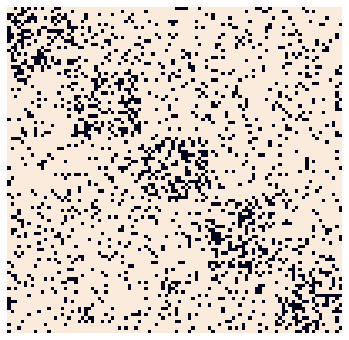

In [10]:
fig, ax = plt.subplots(figsize = (6,6))
ax = sns.heatmap(train, linewidth=0.0, ax = ax, cbar=False, cmap= 'rocket_r', xticklabels=[], yticklabels=[])
plt.show()

,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
PY_All,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PY_Test,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PY_bi_All,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PY_bi_test,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GN_All,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GN_Test,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GN_bi_All,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GN_bi_test,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
PY_All,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PY_Test,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PY_bi_All,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PY_bi_test,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GN_All,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GN_Test,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GN_bi_All,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GN_bi_test,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
missing_percents = [i/20 for i in range(20)]

config_uni = {'directed': True,
          'binary': True,
          'unicluster': True}

config_bi = {'directed': True,
          'binary': True,
          'unicluster': False}

df = pd.DataFrame(0, index = ["PY_All", "PY_Test", 'PY_bi_All', 'PY_bi_test', "GN_All", "GN_Test", 'GN_bi_All', 'GN_bi_test'], columns = [i/20 for i in range(20)])

for i, percent in enumerate(missing_percents):
    for j in range(5):
        train, test = train_val_split(X, valid_dim = percent, random_seed= j)
        mask = np.invert(test.astype('bool'))
        
        PY = SBM(config_uni, prior_r = "PY", alpha_PY_r=0.6,sigma_PY_r=-0.3, 
                start_z = "singleton", set_seed=42)
        PY.fit(train,100)
        PY.compute_block_probabilities()
        PY.predict()
        df.iloc[0,i] += np.sum(np.abs((X_gt_theta - PY.X_pred_theta)))/(len(X)*(len(X)-1))

        mask_X_gt = ma.masked_array(X_gt_theta, mask=mask)
        mask_X_pred = ma.masked_array(PY.X_pred_theta, mask = mask)
        df.iloc[1,i] += np.sum(np.abs((mask_X_gt - mask_X_pred)))/np.sum(test)
        
        PY_bi = SBM(config_bi, start_z = "singleton", set_seed=42,
         prior_r = "PY", alpha_PY_r=0.6,sigma_PY_r=-0.3,
         prior_c = "PY", alpha_PY_c=0.6,sigma_PY_c=-0.3)

        PY_bi.fit(train,200)
        PY_bi.compute_block_probabilities()
        PY_bi.predict()
        df.iloc[2,i] += np.sum(np.abs(X_gt_theta - PY_bi.X_pred_theta))/(len(X)*(len(X)-1))

        mask_X_gt = ma.masked_array(X_gt_theta, mask=mask)
        mask_X_pred = ma.masked_array(PY_bi.X_pred_theta, mask = mask)
        df.iloc[3,i] += np.sum(np.abs((mask_X_gt - mask_X_pred)))/np.sum(test)

        GN = SBM(config_uni, prior_r = "GN", gamma_GN_r=0.45,
            start_z = "singleton", set_seed=42)
        GN.fit(train,100)
        GN.compute_block_probabilities()
        GN.predict()
        df.iloc[4,i] += np.sum(np.abs(X_gt_theta - GN.X_pred_theta))/(len(X)*(len(X)-1))

        mask_X_gt = ma.masked_array(X_gt_theta, mask=mask)
        mask_X_pred = ma.masked_array(GN.X_pred_theta, mask = mask)
        df.iloc[5,i] += np.sum(np.abs((mask_X_gt - mask_X_pred)))/np.sum(test)

        GN_bi = SBM(config_bi, start_z = "singleton", set_seed=42,
         prior_r = "GN", gamma_GN_r=0.45,
         prior_c = "GN", gamma_GN_c=0.45)
        GN_bi.fit(train,200)
        GN_bi.compute_block_probabilities()
        GN_bi.predict()
        df.iloc[6,i] += np.sum(np.abs(X_gt_theta - GN_bi.X_pred_theta))/(len(X)*(len(X)-1))

        mask_X_gt = ma.masked_array(X_gt_theta, mask=mask)
        mask_X_pred = ma.masked_array(GN_bi.X_pred_theta, mask = mask)
        df.iloc[7,i] += np.sum(np.abs((mask_X_gt - mask_X_pred)))/np.sum(test)

c:\Users\nakaz\Desktop\DSBA\TESI\BNP-Net\bnpenv\lib\site-packages\pandas\core\internals\blocks.py:937: UserWarning: Warning: converting a masked element to nan.
  values[indexer] = value


In [40]:
import pickle as pkl

In [41]:
# with open("results/df_linkpreds_1.pkl", "wb") as f:
#     pkl.dump(df, f)

In [43]:
# with open("results/df_linkpreds_1.pkl", "rb") as f:
#     df2 = pkl.load(f)
# df2

,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
PY_All,0.100034,0.142499,0.201785,0.278714,0.363199,0.462368,0.592387,0.665515,0.719829,0.792277,0.871179,0.958201,1.042577,1.127781,1.212068,1.301311,1.383833,1.472324,1.561315,1.634807
PY_Test,NaN,0.204321,0.294756,0.406765,0.522356,0.655543,0.837941,0.976294,1.093217,1.217752,1.294117,1.442786,1.579705,1.665952,1.760534,1.864890,1.940997,2.027421,2.116989,2.191340
PY_bi_All,0.100034,0.143773,0.210452,0.290692,0.387226,0.481550,0.604712,0.658264,0.706515,0.792341,0.867884,0.954787,1.041367,1.127532,1.211350,1.301341,1.383833,1.472324,1.561315,1.634807
PY_bi_test,NaN,0.208486,0.316161,0.429769,0.571573,0.702769,0.892390,1.092044,1.209611,1.327674,1.425134,1.517060,1.606693,1.687492,1.774867,1.864549,1.940997,2.027421,2.116989,2.191340
GN_All,0.100034,0.142499,0.201785,0.278714,0.363199,0.464048,0.589840,0.643729,0.719829,0.792280,0.872265,0.958498,1.042720,1.127464,1.212226,1.301288,1.383833,1.472324,1.561315,1.634807
GN_Test,NaN,0.204321,0.294756,0.406765,0.522356,0.655657,0.856378,0.922586,1.093217,1.216692,1.323974,1.457907,1.555659,1.660971,1.752538,1.864115,1.940997,2.027421,2.116989,2.191340
GN_bi_All,0.100034,0.143773,0.210452,0.290601,0.385391,0.480405,0.577391,0.680738,0.713766,0.799157,0.871997,0.954875,1.041367,1.126358,1.211350,1.301255,1.383833,1.472324,1.561218,1.634807
GN_bi_test,NaN,0.208486,0.316161,0.432625,0.565826,0.706301,0.831829,1.103629,1.210661,1.331699,1.421623,1.516921,1.606693,1.686005,1.774867,1.864643,1.940997,2.027421,2.116888,2.191340


<AxesSubplot:>

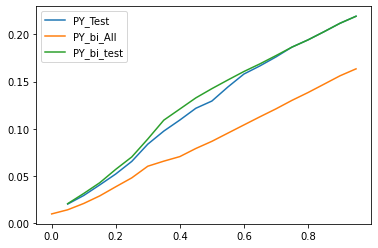

In [39]:
(df.iloc[1:4,:]/10).T.plot()

In [29]:
df/10

,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
PY_All,0.010003,0.014250,0.020178,0.027871,0.036320,0.046237,0.059239,0.066551,0.071983,0.079228,0.087118,0.095820,0.104258,0.112778,0.121207,0.130131,0.138383,0.147232,0.156131,0.163481
PY_Test,NaN,0.020432,0.029476,0.040677,0.052236,0.065554,0.083794,0.097629,0.109322,0.121775,0.129412,0.144279,0.157970,0.166595,0.176053,0.186489,0.194100,0.202742,0.211699,0.219134
PY_bi_All,0.010003,0.014377,0.021045,0.029069,0.038723,0.048155,0.060471,0.065826,0.070652,0.079234,0.086788,0.095479,0.104137,0.112753,0.121135,0.130134,0.138383,0.147232,0.156131,0.163481
PY_bi_test,NaN,0.020849,0.031616,0.042977,0.057157,0.070277,0.089239,0.109204,0.120961,0.132767,0.142513,0.151706,0.160669,0.168749,0.177487,0.186455,0.194100,0.202742,0.211699,0.219134
GN_All,0.010003,0.014250,0.020178,0.027871,0.036320,0.046405,0.058984,0.064373,0.071983,0.079228,0.087227,0.095850,0.104272,0.112746,0.121223,0.130129,0.138383,0.147232,0.156131,0.163481
GN_Test,NaN,0.020432,0.029476,0.040677,0.052236,0.065566,0.085638,0.092259,0.109322,0.121669,0.132397,0.145791,0.155566,0.166097,0.175254,0.186411,0.194100,0.202742,0.211699,0.219134
GN_bi_All,0.010003,0.014377,0.021045,0.029060,0.038539,0.048041,0.057739,0.068074,0.071377,0.079916,0.087200,0.095488,0.104137,0.112636,0.121135,0.130126,0.138383,0.147232,0.156122,0.163481
GN_bi_test,NaN,0.020849,0.031616,0.043262,0.056583,0.070630,0.083183,0.110363,0.121066,0.133170,0.142162,0.151692,0.160669,0.168600,0.177487,0.186464,0.194100,0.202742,0.211689,0.219134


In [18]:
for i,percent in missing_percents:
    print(i, percent)

TypeError: cannot unpack non-iterable float object